In [ ]:
!wget -q -r -A '*ubyte.gz' --no-parent  'http://yann.lecun.com/exdb/mnist/'
!rm -rf DATA
!mkdir DATA
!mv yann.lecun.com/exdb/mnist/* DATA/
!rm -rf yann.lecun.com
!gunzip DATA/*

In [ ]:
!ls DATA

t10k-images-idx3-ubyte	train-images-idx3-ubyte
t10k-labels-idx1-ubyte	train-labels-idx1-ubyte


In [ ]:
!pip3 install -q idx2numpy

import idx2numpy
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X_train = idx2numpy.convert_from_file('DATA/train-images-idx3-ubyte')
Y_train = idx2numpy.convert_from_file('DATA/train-labels-idx1-ubyte')

X_test = idx2numpy.convert_from_file('DATA/t10k-images-idx3-ubyte')
Y_test = idx2numpy.convert_from_file('DATA/t10k-labels-idx1-ubyte')

In [ ]:
X_cross = X_train[50000:]
Y_cross = Y_train[50000:]

X_train = X_train[:50000]
Y_train = Y_train[:50000]

In [ ]:
print("X_Train",X_train.shape)
print("Y_Train",X_train.shape)

print("X_cross",X_cross.shape)
print("Y_cross",X_cross.shape)

print("X_Test",X_test.shape)
print("Y_Test",X_test.shape)

X_Train (50000, 28, 28)
Y_Train (50000, 28, 28)
X_cross (10000, 28, 28)
Y_cross (10000, 28, 28)
X_Test (10000, 28, 28)
Y_Test (10000, 28, 28)


In [ ]:
np.set_printoptions(linewidth=np.nan)
print(X_train[13])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38 222 225   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 147 234 252 176   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  23 197 253 252 208  19   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  38 178 252 253 117  65   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  57 252 252 253  89   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  38 222 253 253  79   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 131 252 179  27   0   0   0   0   

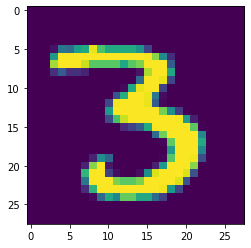

In [ ]:
digit = X_train[12]
plt.imshow(digit)
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical

In [ ]:
X_train = X_train.reshape(X_train.shape[0], -1) # flattens X_train to 50,000 * (1*28*28) : Basically keeps the first dimension intact and flattens all other dimensions
X_train = X_train.astype('float32')
X_train /= 255

X_cross = X_cross.reshape(X_cross.shape[0], -1)
X_cross = X_cross.astype('float32')
X_cross /= 255

X_test = X_test.reshape(X_test.shape[0], -1)
X_test = X_test.astype('float32')
X_test /= 255


Y_train = to_categorical(Y_train, 10)
Y_cross = to_categorical(Y_cross, 10)
Y_test = to_categorical(Y_test, 10)

num_classes = Y_test.shape[1]

In [ ]:
print("X_Train",X_train.shape)
print("Y_Train",X_train.shape)

print("X_cross",X_cross.shape)
print("Y_cross",X_cross.shape)

print("X_Test",X_test.shape)
print("Y_Test",X_test.shape)

X_Train (50000, 784)
Y_Train (50000, 784)
X_cross (10000, 784)
Y_cross (10000, 784)
X_Test (10000, 784)
Y_Test (10000, 784)


In [ ]:
model = Sequential()

# First Hidden Layer (input layer is implicit from the input_dim)
model.add( Dense(units=100, input_shape=(28*28,), activation='relu',name='Hidden-1'))

# Second Hidden Layer
model.add( Dense(units=100, activation='relu',name='Hidden-2') )

# Output layer
model.add( Dense(units=num_classes, activation='sigmoid',name='OutputLayer') )

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden-1 (Dense)             (None, 100)               78500     
_________________________________________________________________
Hidden-2 (Dense)             (None, 100)               10100     
_________________________________________________________________
OutputLayer (Dense)          (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, Y_train, validation_data=(X_cross, Y_cross), epochs=20, batch_size=200, verbose=1)

Epoch 1/20
250/250 [==============================] - 1s 3ms/step - loss: 2.1746 - accuracy: 0.3520 - val_loss: 2.0030 - val_accuracy: 0.5808
Epoch 2/20
250/250 [==============================] - 1s 3ms/step - loss: 1.6197 - accuracy: 0.6871 - val_loss: 1.0656 - val_accuracy: 0.8001
Epoch 3/20
250/250 [==============================] - 1s 3ms/step - loss: 0.8156 - accuracy: 0.8162 - val_loss: 0.5947 - val_accuracy: 0.8665
Epoch 4/20
250/250 [==============================] - 1s 3ms/step - loss: 0.5582 - accuracy: 0.8585 - val_loss: 0.4569 - val_accuracy: 0.8854
Epoch 5/20
250/250 [==============================] - 1s 3ms/step - loss: 0.4617 - accuracy: 0.8768 - val_loss: 0.3941 - val_accuracy: 0.8961
Epoch 6/20
250/250 [==============================] - 1s 3ms/step - loss: 0.4108 - accuracy: 0.8875 - val_loss: 0.3589 - val_accuracy: 0.9047
Epoch 7/20
250/250 [==============================] - 1s 3ms/step - loss: 0.3793 - accuracy: 0.8947 - val_loss: 0.3356 - val_accuracy: 0.9075
Epoch 

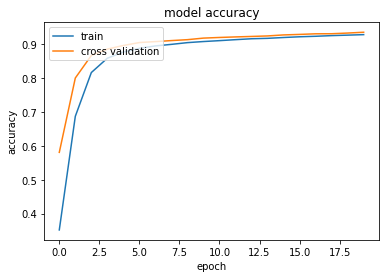

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'cross validation'], loc='upper left')
plt.show()

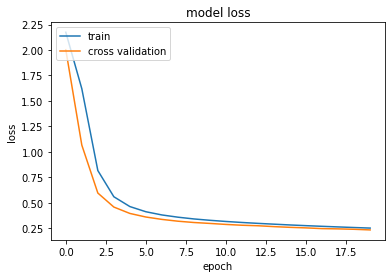

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'cross validation'], loc='upper left')
plt.show()

In [ ]:
prediction = model.predict(X_test)

In [ ]:
print(prediction.shape)
print(Y_test.shape)

(10000, 10)
(10000, 10)


In [ ]:
preIndex = np.argmax(prediction,axis=1)
labIndex = np.argmax(Y_test,axis=1)

In [ ]:
confusion_matrix = tf.math.confusion_matrix(labIndex,preIndex)

In [ ]:
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    2,    1,    0,    3,   10,    2,    3,    0],
       [   0, 1113,    3,    2,    0,    1,    3,    2,   11,    0],
       [   8,    4,  947,   10,    8,    0,   15,   14,   20,    6],
       [   3,    0,   20,  929,    0,   17,    3,   14,   14,   10],
       [   1,    1,    5,    0,  910,    0,   13,    4,    7,   41],
       [  11,    4,    4,   32,    8,  779,   18,    7,   19,   10],
       [  11,    3,    5,    1,   12,    8,  914,    2,    2,    0],
       [   3,    8,   23,    5,    5,    0,    0,  957,    3,   24],
       [   8,    7,    6,   18,    8,   16,   11,   12,  880,    8],
       [  11,    6,    1,    8,   30,    3,    1,   18,    6,  925]], dtype=int32)>

In [ ]:

dic = {}

names = ["Actual_Zero","Actual_One","Actual_Two","Actual_Three","Actual_Four","Actual_Five","Actual_Six","Actual_Seven","Actual_Eight","Actual_Nine"]


dic["confusion_matrix"]=names

for idx,name in enumerate(names):
  vals = [confusion_matrix[i][idx].numpy() for i in range(10)]
  dic["Predicted_"+name.split("_")[1]]=vals
  # print(name,idx)

print(dic)

{'confusion_matrix': ['Actual_Zero', 'Actual_One', 'Actual_Two', 'Actual_Three', 'Actual_Four', 'Actual_Five', 'Actual_Six', 'Actual_Seven', 'Actual_Eight', 'Actual_Nine'], 'Predicted_Zero': [959, 0, 8, 3, 1, 11, 11, 3, 8, 11], 'Predicted_One': [0, 1113, 4, 0, 1, 4, 3, 8, 7, 6], 'Predicted_Two': [2, 3, 947, 20, 5, 4, 5, 23, 6, 1], 'Predicted_Three': [1, 2, 10, 929, 0, 32, 1, 5, 18, 8], 'Predicted_Four': [0, 0, 8, 0, 910, 8, 12, 5, 8, 30], 'Predicted_Five': [3, 1, 0, 17, 0, 779, 8, 0, 16, 3], 'Predicted_Six': [10, 3, 15, 3, 13, 18, 914, 0, 11, 1], 'Predicted_Seven': [2, 2, 14, 14, 4, 7, 2, 957, 12, 18], 'Predicted_Eight': [3, 11, 20, 14, 7, 19, 2, 3, 880, 6], 'Predicted_Nine': [0, 0, 6, 10, 41, 10, 0, 24, 8, 925]}


In [ ]:
import pandas as pd
pd.DataFrame(dic)

,confusion_matrix,Predicted_Zero,Predicted_One,Predicted_Two,Predicted_Three,Predicted_Four,Predicted_Five,Predicted_Six,Predicted_Seven,Predicted_Eight,Predicted_Nine
0,Actual_Zero,959,0,2,1,0,3,10,2,3,0
1,Actual_One,0,1113,3,2,0,1,3,2,11,0
2,Actual_Two,8,4,947,10,8,0,15,14,20,6
3,Actual_Three,3,0,20,929,0,17,3,14,14,10
4,Actual_Four,1,1,5,0,910,0,13,4,7,41
5,Actual_Five,11,4,4,32,8,779,18,7,19,10
6,Actual_Six,11,3,5,1,12,8,914,2,2,0
7,Actual_Seven,3,8,23,5,5,0,0,957,3,24
8,Actual_Eight,8,7,6,18,8,16,11,12,880,8
9,Actual_Nine,11,6,1,8,30,3,1,18,6,925
